## 3. Plotting notebook
----


In [1]:
#libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scienceplots


plt.style.use(["science", "no-latex"])
plt.rcParams["font.family"] = "Times New Roman"

<Axes: >

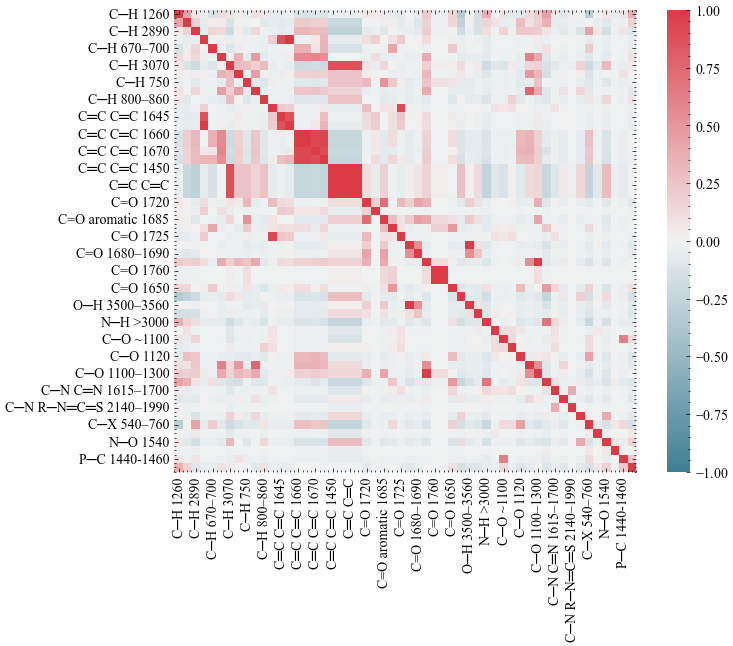

In [2]:
flags = pd.read_csv(os.path.join('..', 'data', 'EC50_flags_short_names.csv'))
flags = flags.drop(columns='Unnamed: 0')
X = flags.iloc[:, 25:]


cols_same_values = []
for col in X.columns:
    if X[col].nunique()==1:
        cols_same_values.append(col)
        
X = X.drop(columns=cols_same_values)
y = flags['Effect value']

corr = X.corr()



upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

column_list = [i for i in X.columns if '─' in i]
drop_list = []
for i in column_list:
    if X[i].sum() == 0:
        drop_list.append(i)

X.drop(drop_list, axis=1, inplace=True)
corr = X.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# plt.savefig('./plots/corr-plot.png', dpi=300)

In [3]:
fname = os.path.join('..', 'data', 'EC50_flags.csv')
flags_tox = pd.read_csv(fname)

In [4]:
flag = []
for i,row in flags_tox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
flags_tox.insert(0, 'flag', flag)



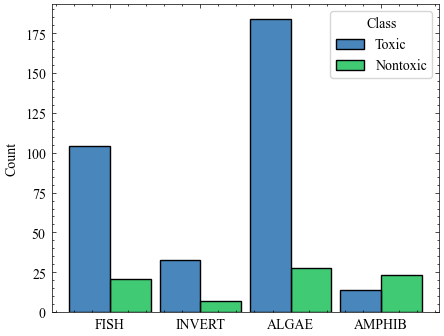

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
sns.histplot(data=flags_tox.drop_duplicates(subset='Chemical name'),
              x='Trophic Level', hue='flag', multiple="dodge", shrink=.9, ax=ax)
# ax.title('Flags - Tox')
# ax.legend(frameon=True)
legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles, ['Toxic', 'Nontoxic'],title='Class', frameon=True)
ax.set_xlabel('')
plt.savefig('../plots/count_groups.png', dpi=300)
plt.show()